In [1]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# Preprocesssing the data

In [4]:
#Shape of the data
df.shape

(5728, 2)

In [5]:
#Columns
df.columns

Index(['text', 'spam'], dtype='object')

In [6]:
#Removing duplicates
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(5695, 2)

In [8]:
#Check for missing data
df.isnull().sum()

text    0
spam    0
dtype: int64

In [9]:
df.groupby('spam').count()

,text
spam,
0,4327
1,1368


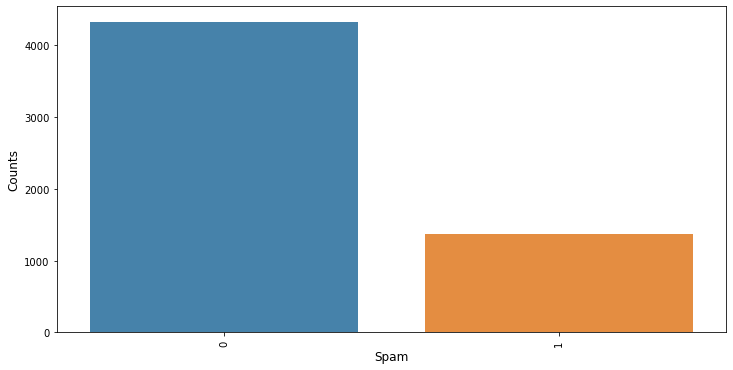

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
label_counts = df.spam.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [11]:
#Stopword package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Tokenization

In [12]:
def process_text(text):
    #Remove the punctuations
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #Remove Strowords
    clean_words = [word for word in  nopunc.split() if word.lower() not in stopwords.words('english') ]
    
    #Return list of clean text words
    return clean_words



In [18]:
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [19]:
message_data_copy = df['text'].copy()
message_data_copy = message_data_copy.apply(text_preprocess)

In [20]:
print(message_data_copy)

0       Subject naturally irresistible corporate ident...
1       Subject stock trading gunslinger fanny merrill...
2       Subject unbelievable new homes made easy im wa...
3       Subject 4 color printing special request addit...
4       Subject money get software cds software compat...
                              ...                        
5723    Subject research development charges gpg forwa...
5724    Subject receipts visit jim thanks invitation v...
5725    Subject enron case study update wow day super ...
5726    Subject interest david please call shirley cre...
5727    Subject news aurora 5 2 update aurora version ...
Name: text, Length: 5695, dtype: object


# Vectorization

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer  = TfidfVectorizer("english")
message_mat = vectorizer.fit_transform(message_data_copy)
message_mat

<5695x37187 sparse matrix of type '<class 'numpy.float64'>'
	with 544384 stored elements in Compressed Sparse Row format>

In [22]:
print(message_mat)

  (0, 18513)	0.054968610144776595
  (0, 26345)	0.07957984862389081
  (0, 20966)	0.04871593365622061
  (0, 9062)	0.09542942112354177
  (0, 28842)	0.07687470062065854
  (0, 21055)	0.08450081604335585
  (0, 32580)	0.11150747315175288
  (0, 14502)	0.09355701220828218
  (0, 14170)	0.08743474156436504
  (0, 8322)	0.06757655429861795
  (0, 4751)	0.07531090141784935
  (0, 34762)	0.09407155679063696
  (0, 27189)	0.057621043616563
  (0, 16371)	0.0852669849992569
  (0, 29821)	0.09330538783473592
  (0, 343)	0.0707078170067817
  (0, 7384)	0.08911307909854094
  (0, 15554)	0.10601861627492867
  (0, 7144)	0.0869097477767971
  (0, 4206)	0.11080386674538054
  (0, 10830)	0.0598372702106354
  (0, 33525)	0.0691632651130315
  (0, 36390)	0.059659027014386704
  (0, 12265)	0.10947736905165323
  (0, 30181)	0.046120867476797854
  :	:
  (5694, 31543)	0.0842243374332838
  (5694, 28778)	0.036931750575061005
  (5694, 10825)	0.047186370161168056
  (5694, 24384)	0.01908723779599118
  (5694, 9139)	0.04857921788506317
 

In [ ]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [33]:
df['length'] = df['text'].apply(len)
df.head(15)

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
5,"Subject: great nnews hello , welcome to medzo...",1,478
6,Subject: here ' s a hot play in motion homela...,1,9340
7,Subject: save your money buy getting this thin...,1,446
8,Subject: undeliverable : home based business f...,1,507
9,Subject: save your money buy getting this thin...,1,446


In [35]:
length = df['length'].to_numpy()
new_mat = np.hstack((message_mat.todense(),length[:, None]))

# By Using Logistic Regression

In [36]:
from sklearn.model_selection import train_test_split
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat, 
                                                        df['spam'], test_size=0.3, random_state=20)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
pred = Spam_model.predict(message_test)
accuracy_score(spam_nospam_test,pred)

0.973083674663546

In [17]:
#matrix of token count
msgX = 'hello hello world hello world play'
msgY = 'test test test test one hello'


from sklearn.feature_extraction.text import CountVectorizer

#from sklearn.pipeline import Pipeline

#vectorizer = TfidfVectorizer("english")

#message_mat = vectorizer.fit_transform([[msgX],[msgY]])
#message_mat

bowXY = CountVectorizer(analyzer=process_text).fit_transform([[msgX],[msgY]])
print(bowXY)

  (0, 0)	3
  (0, 4)	2
  (0, 2)	1
  (1, 0)	1
  (1, 3)	4
  (1, 1)	1


In [20]:
bowXY.shape

(2, 5)

In [ ]:
#from sklearn.feature_extraction.text import TfidfTransformer
#bow_msgs = vectorizer.fit_transform(message_data_copy)

In [23]:
#Converting collecction of text to matriz token count 
from sklearn.feature_extraction.text import CountVectorizer
bow_messages = CountVectorizer(analyzer=process_text).fit_transform(message_data_copy)

In [24]:
print(bow_messages)

  (0, 3638)	1
  (0, 23369)	1
  (0, 18841)	1
  (0, 10065)	1
  (0, 17696)	1
  (0, 21140)	1
  (0, 27986)	1
  (0, 16674)	1
  (0, 28110)	1
  (0, 9296)	3
  (0, 21654)	2
  (0, 15429)	1
  (0, 32602)	1
  (0, 18238)	1
  (0, 18886)	1
  (0, 16089)	2
  (0, 8054)	1
  (0, 20952)	3
  (0, 32319)	1
  (0, 31968)	1
  (0, 24838)	1
  (0, 36025)	2
  (0, 21431)	2
  (0, 33037)	1
  (0, 23040)	2
  :	:
  (5694, 24818)	2
  (5694, 21624)	1
  (5694, 5729)	9
  (5694, 30934)	1
  (5694, 2828)	3
  (5694, 13338)	1
  (5694, 13127)	1
  (5694, 17388)	1
  (5694, 14130)	1
  (5694, 20273)	1
  (5694, 31827)	1
  (5694, 13128)	1
  (5694, 20467)	1
  (5694, 35288)	1
  (5694, 8629)	1
  (5694, 30082)	1
  (5694, 13522)	5
  (5694, 36185)	1
  (5694, 959)	2
  (5694, 2797)	1
  (5694, 30287)	1
  (5694, 17590)	1
  (5694, 33923)	1
  (5694, 10373)	1
  (5694, 11386)	1


In [38]:

X_train,X_test,Y_train,Y_test = train_test_split(bow_messages,df['spam'],test_size=0.20,random_state=0)

In [39]:
bow_messages.shape

(5695, 37229)

In [61]:
bow_train, bow_test, bspam_nospam_train, bspam_nospam_test = train_test_split(bow_messages, 
                                                        df['spam'], test_size=0.3, random_state=20)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(bow_train, bspam_nospam_train)
pred = Spam_model.predict(bow_test)
accuracy_score(bspam_nospam_test,pred)

0.9853715623171445

In [68]:
X_train,X_test,y_train,y_test = train_test_split(df["text"],df["spam"], test_size = 0.2, random_state = 10)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4556,)
(1139,)
(4556,)
(1139,)


In [67]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
vect = CountVectorizer(stop_words='english')
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [71]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

['00', '000', '0000', '00000000', '000000000003619', '000000000003991', '000000000005168', '000000000005409', '000000000005411', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012735', '000000000012736']
['zunaechst', 'zunf', 'zur', 'zurich', 'zusaetzlich', 'zuzana', 'zwabic', 'zwischen', 'zwlaszcza', 'zwrocic', 'zwwyw', 'zwzm', 'zxghlajf', 'zyban', 'zyc', 'zygoma', 'zymg', 'zzn', 'zzncacst', 'zzzz']


In [72]:
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)
type(X_test_df)

scipy.sparse.csr.csr_matrix

In [74]:
prediction = dict()
# Naive Bayes Machine Learning Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB()

In [75]:
prediction["naive_bayes"] = model.predict(X_test_df)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
accuracy_score(y_test,prediction["naive_bayes"])

0.990342405618964

In [79]:
print(classification_report(y_test, prediction['naive_bayes'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       852
        Spam       0.98      0.98      0.98       287

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



In [81]:
def classify(user_input):
    custom_train = [('text', [user_input])]
    custom_train = pd.DataFrame.from_items(custom_train)
    text = custom_train.iloc[:, 0].values
    return model.predict(vectorize.transform(text))

text = input('Type here something and see if it belongs to spam: ')
if classify(text):
    print('spam')
else:
    print('ham')

Type here something and see if it belongs to spam: You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.


AttributeError: type object 'DataFrame' has no attribute 'from_items'

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Dell/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Dell\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
